In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import sklearn.datasets

In [3]:
boston = sklearn.datasets.load_boston()

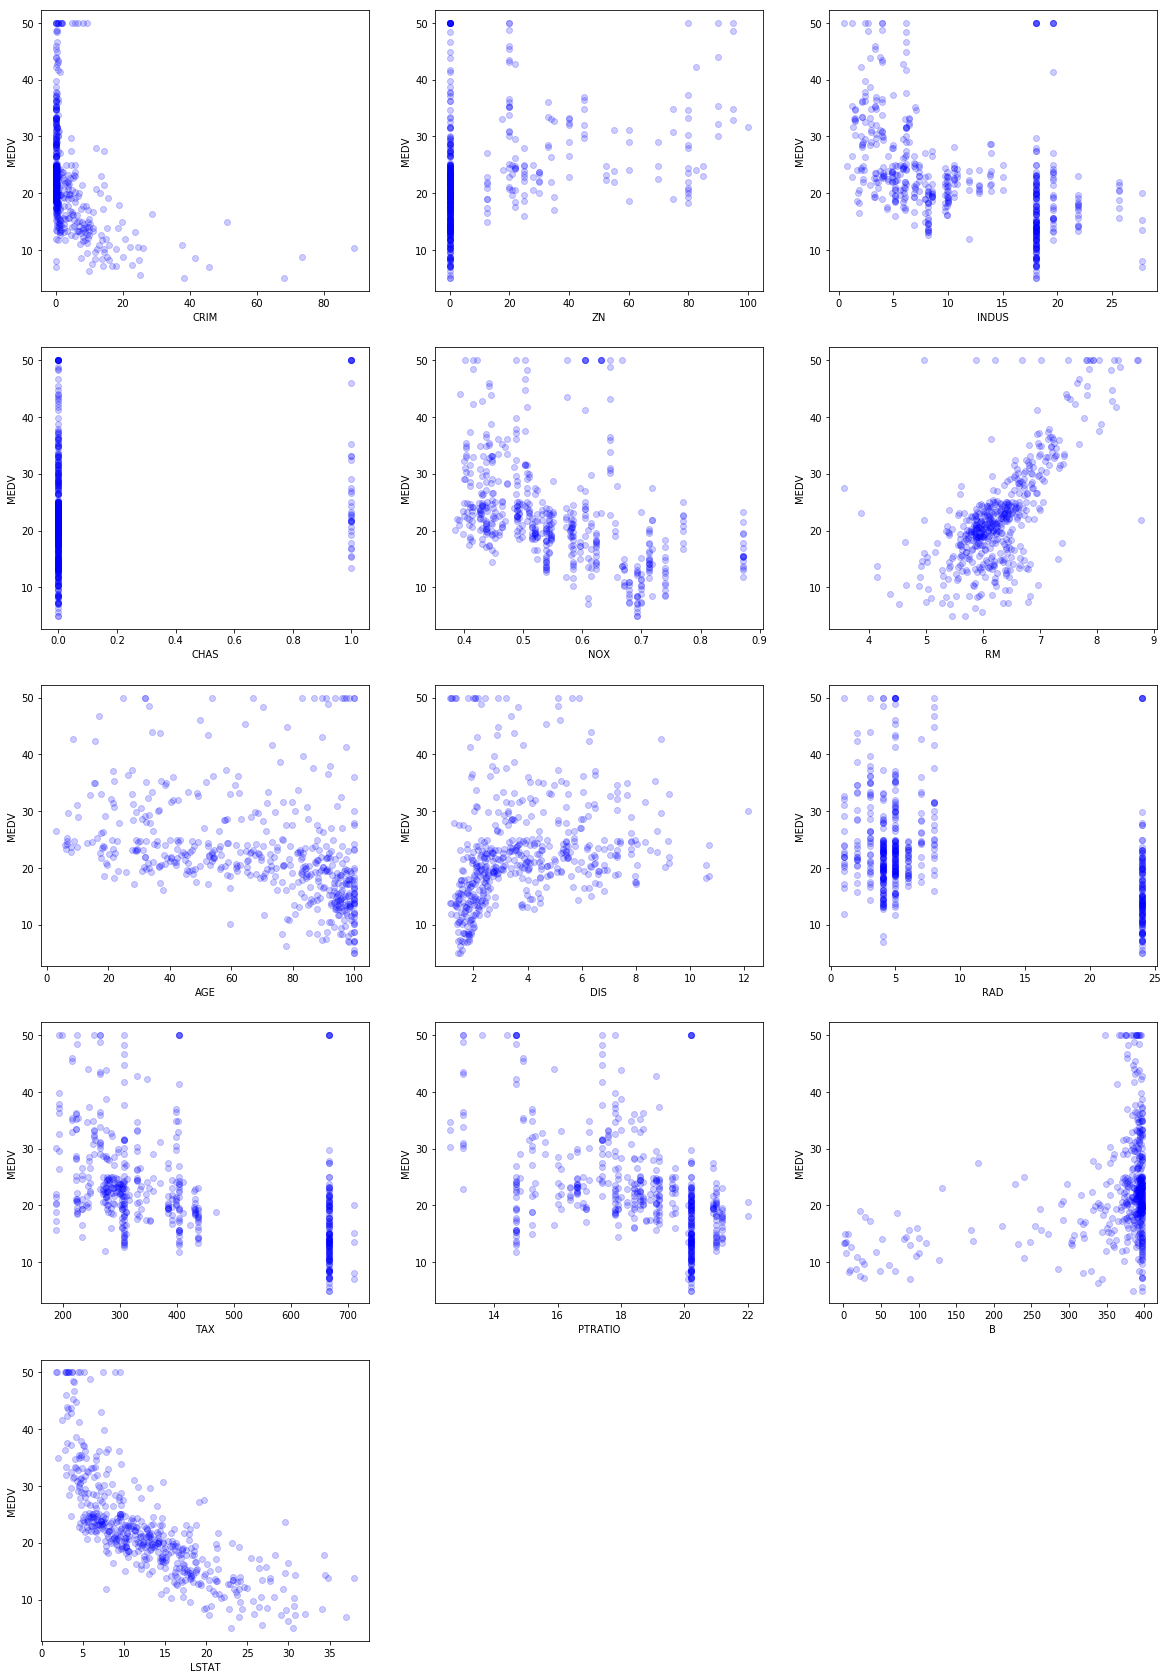

In [4]:
c = (int(np.ceil(boston.data.shape[1] / 3.0)), 3)

plt.figure(1, figsize=(20, 30))

for i in range(0, boston.data.shape[1]):
    plt.subplot2grid(c, (int(np.floor(i / 3.0)), i % 3))
    plt.scatter(boston.data[:, i], boston.target, marker='o', c='b', alpha=0.2)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel('MEDV')

plt.show()

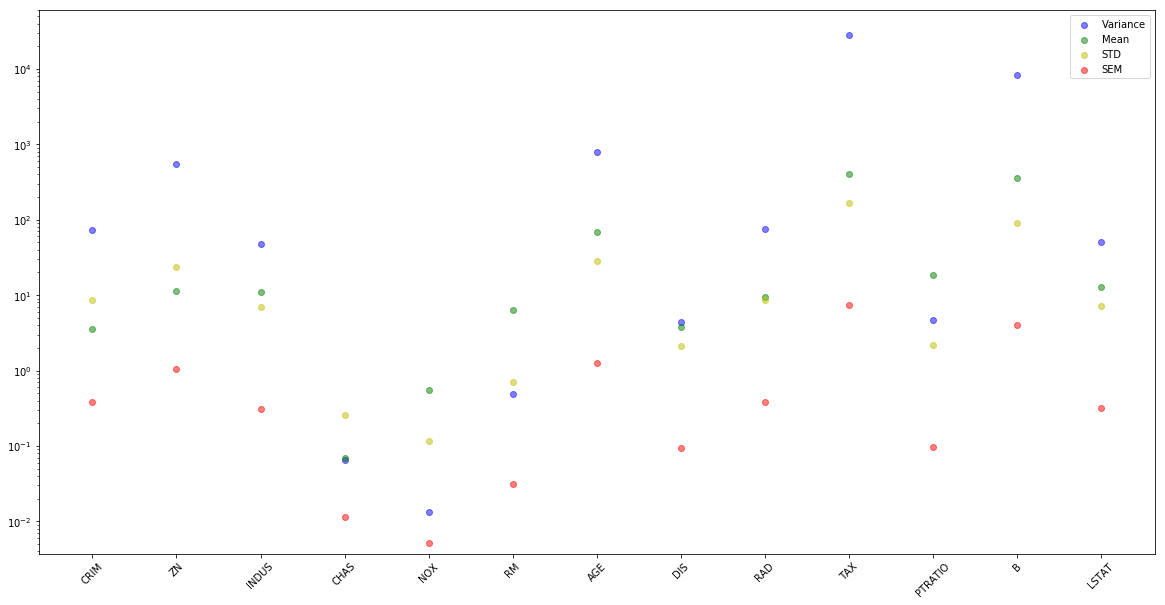

In [36]:
plt.figure(2, figsize=(20, 10))

x = np.arange(0, boston.data.shape[1])

plt.scatter(x, boston.data.T.var(axis=1), marker='o', c='b', alpha=0.5, label='Variance')
plt.scatter(x, boston.data.T.mean(axis=1), marker='o', c='g', alpha=0.5, label='Mean')
plt.scatter(x, boston.data.T.std(axis=1), marker='o', c='y', alpha=0.5, label='STD')
plt.scatter(x, sc.stats.sem(boston.data.T, axis=1), marker='o', c='r', alpha=0.5, label='SEM')

plt.gca().set_yscale('log')
plt.xticks(x, boston.feature_names, rotation=45)
plt.legend()
plt.show()

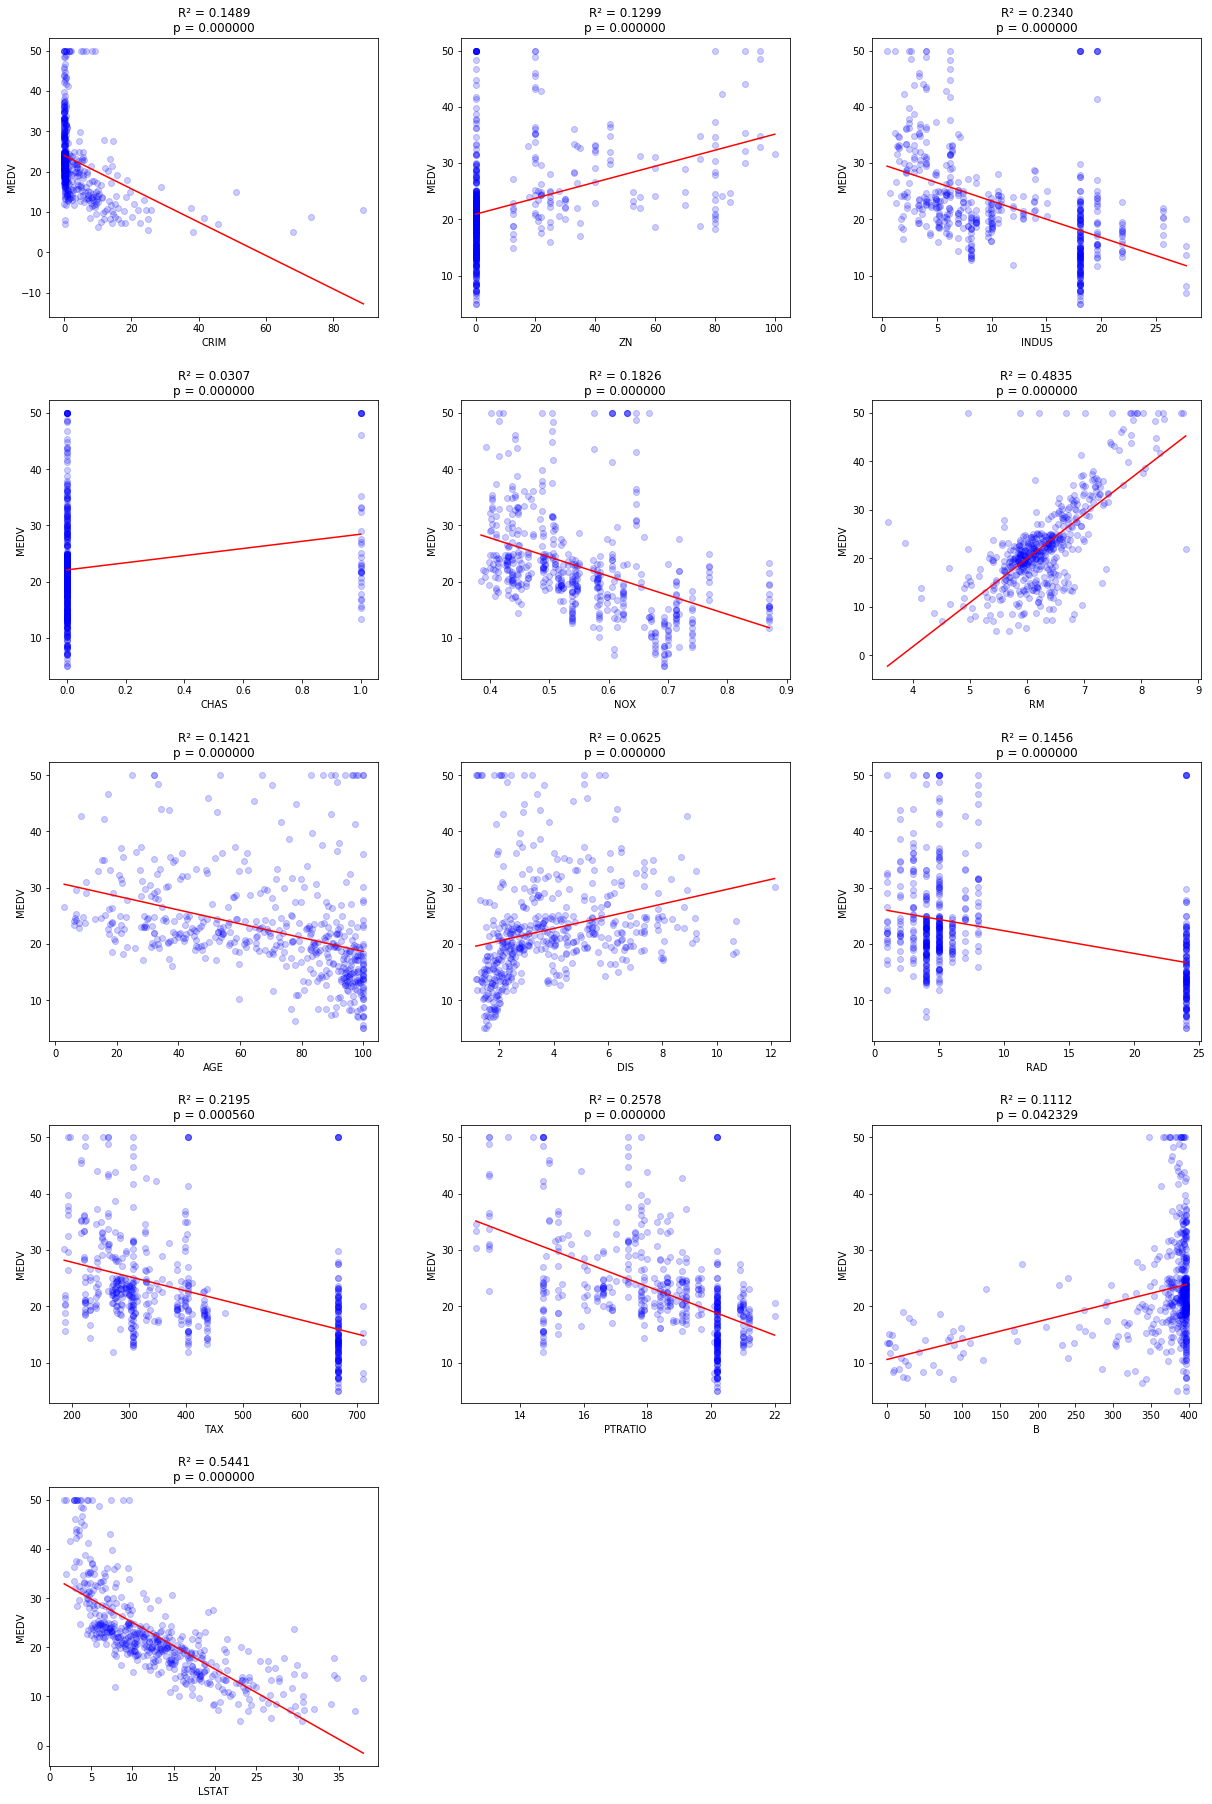

In [35]:
c = (int(np.ceil(boston.data.shape[1] / 3.0)), 3)

plt.figure(1, figsize=(20, 30))

boTargetMean = boston.target.mean()
boTargetMinusMean = boston.target - boTargetMean

for i in range(0, boston.data.shape[1]):
    plt.subplot2grid(c, (int(np.floor(i / 3.0)), i % 3))
    plt.scatter(boston.data[:, i], boston.target, marker='o', c='b', alpha=0.2)
    
    boDataMean = boston.data[:, i].mean()
    boDataMinusMean = boston.data[:, i] - boDataMean
    
    b1 = boDataMinusMean.dot(boTargetMinusMean) / boDataMinusMean.dot(boDataMinusMean)
    b0 = boTargetMean - b1 * boDataMean
    
    targetHat = b1 * boston.data[:, i] + b0
    targetMinusTargetHat = boston.target - targetHat
    
    targetHatMean = targetHat.mean()
    targetHatMinusTargetHatMean = targetHat - targetHatMean
    
    RSS = (targetMinusTargetHat ** 2).sum()
    R2 = 1. - RSS / (boTargetMinusMean ** 2).sum()
    SE = RSS / (targetHatMinusTargetHatMean ** 2).sum() / (boston.data.shape[0] - 2)
    t = b1 / SE
    p = sc.stats.norm.pdf(t, loc=0, scale=1)
    
    plt.plot(
        [boston.data[:, i].min(), boston.data[:, i].max()],
        [b1 * boston.data[:, i].min() + b0, b1 * boston.data[:, i].max() + b0],
        'r-',
    )
    
    plt.xlabel(boston.feature_names[i])
    plt.ylabel('MEDV')
    plt.title('R² = {:.4f}\np = {:f}'.format(R2, p))

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.25, hspace=0.3)
plt.show()